<a href="https://colab.research.google.com/github/jakubdaron/MTR_optymalizacja/blob/main/Optymalizacja_wy%C5%BCarzanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cmax: 615.8294673363353
[4, 49]
[74, 46]


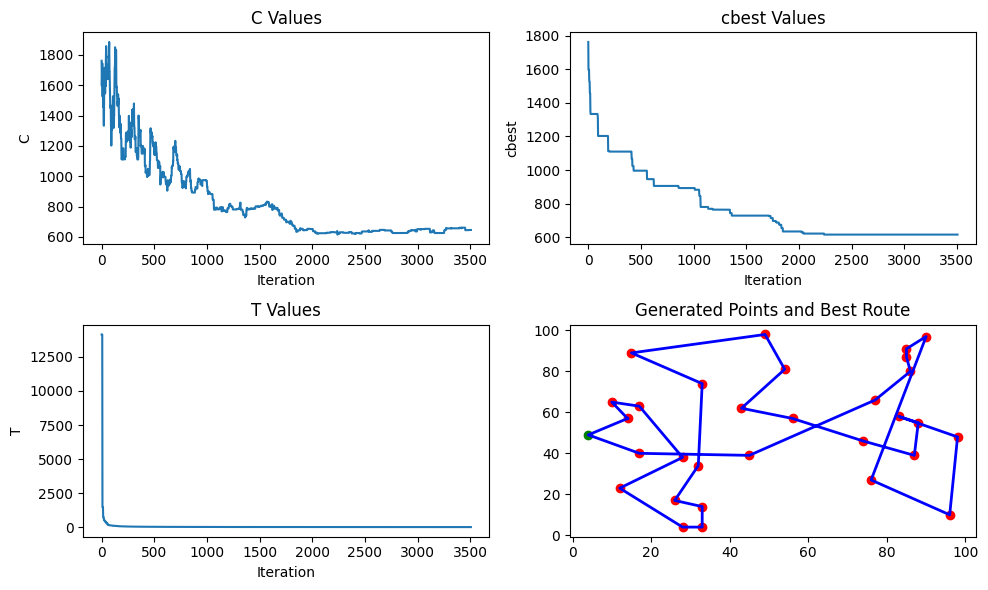

In [66]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def swap(a, b):
    # Zamiana miejscami dwóch elementów
    return b, a

def rand_pi(n):
    pi = list(range(1, n + 1))

    for j in range(1, n + 1):
        k = random.randint(1, n)
        pi[k - 1], pi[n - j] = swap(pi[k - 1], pi[n - j])

    return pi

'''
def Cmax(n, p, pi):
    C = [[0 for _ in range(n + 1)] for _ in range(n + 1)]

    C[1][1] = p[1][pi[1]]
    for j in range(2, n + 1):
        C[1][j] = C[1][j - 1] + p[1][pi[j - 1]]

    for i in range(2, n + 1):
        C[i][1] = C[i - 1][1] + p[i][pi[1]]
        for j in range(2, n + 1):
            C[i][j] = maximum(C[i][j - 1], C[i - 1][j]) + p[i][pi[j - 1]]

    return C[n][n]'''

def Cmax(n, p, pi):
    road = 0

    for j in range(n-1):
        delta_point_X = p[pi[j]][0] - p[pi[j+1]][0]
        delta_point_Y = p[pi[j]][1] - p[pi[j+1]][1]
        road += math.sqrt(delta_point_X**2 + delta_point_Y**2)
    #print(road)
    delta_point_X = p[0][0] - p[pi[n-1]][0]
    delta_point_Y = p[0][1] - p[pi[n-1]][1]
    road += math.sqrt(delta_point_X**2 + delta_point_Y**2)
    return road

def sa(n, p, pi, cbest, pibest, results):
    iter = 0
    k = n // 4
    K = n * n // 4
    c = 0
    eps = 1e-5
    d = 0.1
    P = 0.9

    pi = rand_pi(n)
    Dmax = 0
    for s in range(1, K + 1):
        a = random.randint(1, n)
        b = random.randint(1, n)
        pi[a - 1], pi[b - 1] = swap(pi[a - 1], pi[b - 1])
        cp = Cmax(n, p, pi)
        Delta = cp - c
        Dmax = max(Dmax, Delta)
        c = cp

    T = -Dmax / math.log(P)

    pi = rand_pi(n)
    for j in range(1, n + 1):
        pibest[j - 1] = pi[j - 1]

    cbest[0] = c = cp = Cmax(n, p, pi)

    while iter <= 500:
        av = d2 = 0
        for s in range(1, k + 1):
            a = random.randint(1, n)
            b = random.randint(1, n)
            pi[a - 1], pi[b - 1] = swap(pi[a - 1], pi[b - 1])
            cp = Cmax(n, p, pi)

            new_results = [c, cp, cbest[0], T]
            results.append(new_results)

            Delta = cp - c
            av += cp
            d2 += cp * cp

            if cp < cbest[0]:
                cbest[0] = cp
                for j in range(1, n + 1):
                    pibest[j - 1] = pi[j - 1]

            if Delta <= 0:
                c = cp
                continue

            R = random.randint(1, 32000) / 32000.0
            if R < math.exp(-Delta / T):
                c = cp
                continue

            pi[a - 1], pi[b - 1] = swap(pi[a - 1], pi[b - 1])

        sigma = math.sqrt(d2 / k - (av / k) * (av / k))
        if sigma < eps:
            return 1  # sprawdzenie, czy blisko zera

        lambda_ = math.log(1 + d) / (3 * sigma)  # modyfikacja lambda
        T = T / (1 + lambda_ * T)  # chłodzenie
        if T < eps:
            return 2  # warunek zakończenia
        iter += 1

    return 0

def generate(n):
    p = []
    for i in range(n+1):
        p.append([random.randint(1, 99), random.randint(1, 99)])
    #p[n] = p[0]
    return p

def plot_results(results):
    iterations = list(range(len(results)))
    c_values = [result[0] for result in results]
    cp_values = [result[1] for result in results]
    cbest_values = [result[2] for result in results]
    t_values = [result[3] for result in results]

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(iterations, c_values, label='c')
    plt.title('C Values')
    plt.xlabel('Iteration')
    plt.ylabel('C')

    #plt.subplot(2, 2, 2)
    #plt.plot(iterations, cp_values, label='cp')
    #plt.title('cp Values')
    #plt.xlabel('Iteration')
    #plt.ylabel('cp')

    plt.subplot(2, 2, 2)
    plt.plot(iterations, cbest_values, label='cbest')
    plt.title('cbest Values')
    plt.xlabel('Iteration')
    plt.ylabel('cbest')

    plt.subplot(2, 2, 3)
    plt.plot(iterations, t_values, label='T')
    plt.title('T Values')
    plt.xlabel('Iteration')
    plt.ylabel('T')

    plt.subplot(2, 2, 4)
    matrix_data = np.array(p)
    plt.scatter(matrix_data[0, 0], matrix_data[0, 1], c='green', marker='o', label='Start Point')
    plt.scatter(matrix_data[1:, 0], matrix_data[1:, 1], c='red', marker='o', label='Generated Points')
    plt.plot(matrix_data[pibest + [pibest[0]], 0], matrix_data[pibest + [pibest[0]], 1], c='blue', linestyle='-', linewidth=2, label='Best Route')
    plt.title('Generated Points and Best Route')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    n = 30
    #C = [[0 for _ in range(n+1)] for _ in range(n+1)]
    pibest = [0 for _ in range(n+1)]
    pi = [0 for _ in range(n+1)]
    p = [0]

    results = []
    p = generate(n)
    cbest = [0]

    sa(n, p, pi, cbest, pibest, results)
    print("Cmax:", cbest[0])
    plot_results(results)
